<a href="https://colab.research.google.com/github/mrcrdg/jupyter_set/blob/master/MNIST_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2

     |████████████████████████████████| 86.3MB 69kB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 450kB 45.8MB/s 
     |████████████████████████████████| 3.8MB 43.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=693b13980f04cdf96d016284815ab6c0633e5c46becf6c62859d2c11b25cf9ae
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstal

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

Load the dataset and split into test and train data

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Check the Shape of the data

In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


Plot one of the digits:

In [5]:
import seaborn as sns
import random

In [6]:
random_index= random.randint(0,5999)

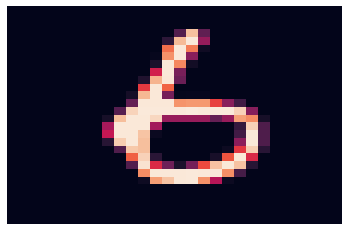

In [7]:
sns.heatmap(x_train[random_index], cbar=False, xticklabels=False, yticklabels=False)

Reshape data so it is just a single line per handwritten digit

In [8]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


Convert class vectors to binary class matrices

In [9]:
print(y_train[100])

5


We need to do the one-hot encoding (adding statistical dummy variables to represent classes)

In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
print(y_train[100])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Start with a very simple model

In [12]:
model1 = Sequential()
model1.add(Dense(8, activation="sigmoid", input_shape=(784,)))
model1.add(Dense(10, activation="softmax"))

Print the model summary

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


Lets compile it using the categorical_crossentropy since this is a classification problem

In [14]:
model1.compile(loss='mse', optimizer="sgd",
               metrics=['accuracy'])

Do the training

In [15]:
history = model1.fit(x_train, y_train,
                     epochs=5,
                     verbose=1)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0877 - accuracy: 0.2223
Epoch 2/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0830 - accuracy: 0.3140
Epoch 3/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0800 - accuracy: 0.3849
Epoch 4/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0774 - accuracy: 0.4468
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0753 - accuracy: 0.4592


Evaluate the quality of the model

In [65]:
score = model1.evaluate(x_test, y_test, verbose=0)
print(score[1])


0.1853


In [17]:
## Melhorar o modelo

- Try addind Dropout layers;
- Increase the number of epochs;
- Try to normalize the data.

In [47]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


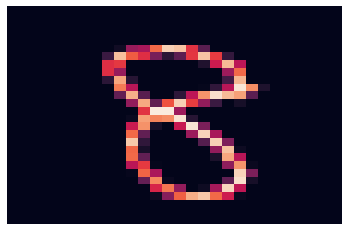

In [48]:
#Plot one of the digits:
random_index= random.randint(0,5999)

sns.heatmap(x_train[random_index], cbar=False, xticklabels=False, yticklabels=False)

In [49]:
#Reshape data so it is just a single line per handwritten digit

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [50]:
## Normalizar

In [51]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [52]:
x_train /= 255
x_test /= 255

In [53]:
## One-hot encoding

In [54]:
print(y_train[255])

3


In [55]:
#  add dummy variables to represent classes
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [56]:
print(y_train[255])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [61]:
## Model
num_classes = 10

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [63]:
#model1.compile(loss='mse', optimizer="sgd", metrics=['accuracy'])

model.compile(loss='mse', optimizer="rmsprop", metrics=['accuracy'])

In [64]:
## training
# history = model1.fit(x_train, y_train, epochs=5, verbose=1)


history = model.fit(x_train, y_train, epochs=30, verbose=1)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 22s 363us/sample - loss: 0.0114 - accuracy: 0.9247
Epoch 2/30
60000/60000 [==============================] - 21s 354us/sample - loss: 0.0063 - accuracy: 0.9609
Epoch 3/30
60000/60000 [==============================] - 21s 355us/sample - loss: 0.0052 - accuracy: 0.9679
Epoch 4/30
60000/60000 [==============================] - 21s 358us/sample - loss: 0.0045 - accuracy: 0.9725
Epoch 5/30
60000/60000 [==============================] - 21s 354us/sample - loss: 0.0039 - accuracy: 0.9763
Epoch 6/30
60000/60000 [==============================] - 21s 357us/sample - loss: 0.0036 - accuracy: 0.9787
Epoch 7/30
60000/60000 [==============================] - 22s 367us/sample - loss: 0.0032 - accuracy: 0.9803
Epoch 8/30
60000/60000 [==============================] - 22s 359us/sample - loss: 0.0032 - accuracy: 0.9809
Epoch 9/30
60000/60000 [==============================] - 21s 358us/sample - loss: 0.0031 - accuracy: 0.9

In [66]:
## Evaluation

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.002849980749160856
Test accuracy: 0.9845
